In [1]:
from datetime import time
from pandas import DataFrame, MultiIndex, IndexSlice, ExcelWriter, to_datetime
from numpy import nan
idx = IndexSlice
%load_ext snakeviz

In [2]:
#================================================ new version ============================================================
import wsgi
from trading.research.mft_backtest import add_trading_daytime_cols, create_backtest_df, \
get_complete_backtest_df, get_txs_pos_dfs, get_pnl_gbp, get_total_daily_pnl, get_perf_matrix, \
get_restructured_data, get_position_cal_df, get_txs_cal_df, get_txs_costs, get_bar_price_df, get_query_symbols, get_origin_data_dic

environ({'ALLUSERSPROFILE': 'C:\\ProgramData', 'APPDATA': 'C:\\Users\\Chacha\\AppData\\Roaming', 'ASL.LOG': 'Destination=file', 'COMMONPROGRAMFILES': 'C:\\Program Files\\Common Files', 'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x86)\\Common Files', 'COMMONPROGRAMW6432': 'C:\\Program Files\\Common Files', 'COMPUTERNAME': 'DESKTOP-HD7IUIP', 'COMSPEC': 'C:\\WINDOWS\\system32\\cmd.exe', 'DEV_DB': 'D:\\ShinyCorp\\db_dev.sqlite3', 'DRIVERDATA': 'C:\\Windows\\System32\\Drivers\\DriverData', 'ENVIRONMENT': 'DEV', 'FPS_BROWSER_APP_PROFILE_STRING': 'Internet Explorer', 'FPS_BROWSER_USER_PROFILE_STRING': 'Default', 'HOMEDRIVE': 'C:', 'HOMEPATH': '\\Users\\Chacha', 'IDEA_INITIAL_DIRECTORY': 'D:\\PyCharm Pro\\PyCharm 2019.3.3\\bin', 'LNKENV': 'C:\\Program Files (x86)\\Internet Explorer\\IEXPLORE.EXE', 'LOCALAPPDATA': 'C:\\Users\\Chacha\\AppData\\Local', 'LOGONSERVER': '\\\\DESKTOP-HD7IUIP', 'NUMBER_OF_PROCESSORS': '12', 'ONEDRIVE': 'D:\\Horatio - One Drive\\OneDrive - Horatio Investments', 'ONE

In [3]:
# from sqlalchemy import create_engine, MetaData, or_, between, and_
# from sqlalchemy.sql import select
# from pandas.errors import EmptyDataError
# database_url = 'sqlite:///D:\\ShinyCorp\\db_dev.sqlite3'
#
# db_engine = create_engine(database_url, echo=False)
# db_meta = MetaData(bind=db_engine)
# db_meta.reflect()
# price_table = db_meta.tables['app_price']

In [4]:
# def select_ts_between_dt(engine, table_obj: str, start_dt, end_dt, where_eq_or: {}=None, where_eq_and: {}=None):
#     clause = select([table_obj])
#     between_dt_condition = table_obj.columns['time'].between(start_dt, end_dt)
#     if where_eq_or is not None:
#         or_condition = []
#         for column_name in where_eq_or:
#             if isinstance(where_eq_or[column_name], list):
#                 for value in where_eq_or[column_name]:
#                     or_condition.append(table_obj.columns[column_name] == value)
#             else:
#                 or_condition.append(table_obj.columns[column_name] == where_eq_or[column_name])
#         or_conditions = or_(*or_condition)
#     else:
#         or_conditions = True
#     if where_eq_and is not None:
#         and_condition = []
#         for column_name in where_eq_and:
#             and_condition.append(table_obj.columns[column_name] == where_eq_and[column_name])
#         and_conditions = and_(*and_condition)
#     else:
#         and_conditions = True
#
#     clause = clause.where(or_conditions & and_conditions & between_dt_condition)
#
#     df_columns = table_obj.columns.keys()
#     data = list(engine.execute(clause))
#     df = DataFrame(data, columns=df_columns)
#     if len(df) == 0:
#         raise EmptyDataError
#     else:
#         return df

# def get_origin_data_dic(start_dt, end_dt, table_obj):
#     fut_5m_p = select_ts_between_dt(db_engine, table_obj, start_dt, end_dt, {'asset_type': 'index_future'}, {'resolution': '5m'})
#     idx_5m_p = select_ts_between_dt(db_engine, table_obj, start_dt, end_dt, {'asset_type': 'equity_index'}, {'resolution': '5m'})
#     fx_5m_p = select_ts_between_dt(db_engine, table_obj, start_dt, end_dt, {'asset_type': 'fx_spot'}, {'resolution': '5m'})
#     daily_p = select_ts_between_dt(db_engine, table_obj, start_dt, end_dt, {'asset_type': ['cash_equity', 'volatility_index', 'equity_index', 'fund']}, {'resolution': '1d'})
#     daily_p = daily_p.pivot_table(index='time', columns='symbol', values='value')
#     dic = {'fut_bar_p': fut_5m_p, 'idx_bar_p': idx_5m_p, 'fx_bar_p': fx_5m_p, 'daily_p': daily_p}
#     return dic


In [3]:
configs = {'opening_signal_threshold': 0.006, 'closing_signal_threshold': -0.006,
               'dealing_cutoff_time_london': time(11, 0, 0),
               'earliest_trading_time_london': {'TP1 Index': time(10, 55, 0), 'ES1 Index': time(10, 55, 0)},
               'minimum_holding_period_days': 10, 'vol_based_thresholds': True, 'open_threshold_factors': [0.00024, 0],
               'close_threshold_factors': [-0.0001, 0], 'equity_trade': False, 'start_dt': '2014-10-01',
               'end_dt': '2020-03-01', 'geo_settings': {'US': 'ES1 Index'}, 'one_position': True,
               'funds': ['JPMUEAA LN Equity', 'HSBAMCA LN Equity'], 'fair_value_threshold_constraint': 0.015}

symbol_dic = get_query_symbols(configs)
dic = get_origin_data_dic(symbol_dic, **configs)
bar_df = get_bar_price_df(dic, symbol_dic, dic['universe'], **configs)
restructured_data = get_restructured_data(bar_df, dic['daily_p'], **configs)
data_dic_by_asset = restructured_data[0]
daily_price_df = restructured_data[1]

# add_trading_daytime_cols(data_dic_by_asset, symbol_dic, **configs)
# backtest_df = create_backtest_df(data_dic_by_asset, **configs)
# backtest_df = get_complete_backtest_df(backtest_df, dic['universe'], **configs)
# txs_pos_dic = get_txs_pos_dfs(backtest_df, daily_price_df, dic['universe'], **configs)
# pnl_gbp = get_pnl_gbp(backtest_df, txs_pos_dic, daily_price_df, dic['universe'], **configs)
# total_daily_pnl_gbp = get_total_daily_pnl(pnl_gbp)
# total_cum_pnl_gbp = total_daily_pnl_gbp.cumsum()
# total_cum_pnl_gbp.plot(grid=True, figsize=(20, 10))
# perf_matrix = get_perf_matrix(total_cum_pnl_gbp)

d:\virtualenvs\datafeed\lib\site-packages\django\db\models\fields\__init__.py:1423: RuntimeWarning: DateTimeField Price.time received a naive datetime (2014-10-01 00:00:00) while time zone support is active.
  RuntimeWarning)
d:\virtualenvs\datafeed\lib\site-packages\django\db\models\fields\__init__.py:1423: RuntimeWarning: DateTimeField Price.time received a naive datetime (2020-03-01 00:00:00) while time zone support is active.
  RuntimeWarning)


In [6]:


# Write FEATURE tests
# Code to calculate threshold everyday for production later 


In [4]:
# configs = {'opening_signal_threshold': 0.006, 'closing_signal_threshold': -0.006,
#                'dealing_cutoff_time_london': time(11, 0, 0),
#                'earliest_trading_time_london': {'TP1 Index': time(10, 55, 0), 'ES1 Index': time(10, 55, 0)},
#                'minimum_holding_period_days': 10, 'vol_based_thresholds': True, 'open_threshold_factors': [0.00025, 0],
#                'close_threshold_factors': [-0.00025, 0], 'equity_trade': False, 'start_dt': '2014-10-01',
#                'end_dt': '2020-03-01', 'geo_settings': {'US': 'ES1 Index'}, 'one_position': True,
#                'funds': ['JPMUEAA LN Equity', 'HSBAMCA LN Equity']}

def run_sim(configs):
    add_trading_daytime_cols(data_dic_by_asset, symbol_dic, **configs)
    backtest_df = create_backtest_df(data_dic_by_asset, **configs)
    backtest_df = get_complete_backtest_df(backtest_df, dic['universe'], **configs)
    txs_pos_dic = get_txs_pos_dfs(backtest_df, daily_price_df, dic['universe'], **configs)
    pnl_gbp = get_pnl_gbp(backtest_df, txs_pos_dic, daily_price_df, dic['universe'], **configs)
    total_daily_pnl_gbp = get_total_daily_pnl(pnl_gbp)
    total_cum_pnl_gbp = total_daily_pnl_gbp.cumsum()
    # total_cum_pnl_gbp.plot(grid=True, figsize=(20, 10))
    perf_matrix = get_perf_matrix(total_cum_pnl_gbp)
    return perf_matrix



In [12]:
%%snakeviz
opening_thresholds = [0.004, 0.005, 0.006, 0.007, 0.008, 0.009]
closing_thresholds = [-0.002, -0.003, -0.004, -0.005, -0.006, -0.007]
configs['vol_based_thresholds'] = False
return_df = DataFrame(index=opening_thresholds, columns=closing_thresholds)
return_df.index.name = 'opn_t'
return_df.columns.name = 'close_t'
sharpe_df = DataFrame(index=opening_thresholds, columns=closing_thresholds)
sharpe_df.index.name = 'opn_t'
sharpe_df.columns.name = 'close_t'
std_df = DataFrame(index=opening_thresholds, columns=closing_thresholds)
std_df.index.name = 'opn_t'
std_df.columns.name = 'close_t'
for opn_t in opening_thresholds:
    configs['opening_signal_threshold'] = opn_t
    for close_t in closing_thresholds:
        configs['closing_signal_threshold'] = close_t
        result = run_sim(configs)
        return_df.loc[opn_t, close_t] = result['Annualised Return']
        std_df.loc[opn_t, close_t] = result['Annualised Std']
        sharpe_df.loc[opn_t, close_t] = result['Sharpe']
        
        

 
*** Profile stats marshalled to file 'C:\\Users\\Chacha\\AppData\\Local\\Temp\\tmpmxx_5w36'. 
Embedding SnakeViz in this document...


In [13]:
return_df

close_t,-0.002,-0.003,-0.004,-0.005,-0.006,-0.007
opn_t,,,,,,
0.004,0.130367,0.130409,0.130249,0.129863,0.118384,0.0827113
0.005,0.129253,0.130817,0.130904,0.133101,0.127054,0.10697
0.006,0.133543,0.133936,0.139034,0.13796,0.133848,0.116801
0.007,0.115246,0.118541,0.130038,0.127767,0.128313,0.120627
0.008,0.108811,0.113896,0.125325,0.127885,0.12843,0.120735
0.009,0.113208,0.116006,0.126385,0.130843,0.131507,0.123984


In [14]:
sharpe_df

close_t,-0.002,-0.003,-0.004,-0.005,-0.006,-0.007
opn_t,,,,,,
0.004,0.949161,0.950589,0.944283,0.938296,0.780086,0.480969
0.005,0.964525,0.973908,0.968752,0.975118,0.895048,0.694282
0.006,1.01838,1.02028,1.05776,1.01772,0.965481,0.782939
0.007,0.908598,0.913968,1.03821,0.981479,0.963066,0.808295
0.008,0.832072,0.859715,0.976394,0.982687,0.964258,0.809299
0.009,0.876084,0.886734,0.994187,1.0182,1.00056,0.841203


In [6]:

opn_t_factors = {'opn_t_beta': [0.00002, 0.00004, 0.00006, 0.00008, 0.0001,
                                0.00012, 0.00014, 0.00016, 0.00018, 0.0002,
                                0.00022, 0.00024, 0.00026, 0.00028, 0.0003,
                                0.00032, 0.00034, 0.00036, 0.00038, 0.0004],
                 'opn_t_alpha': [0]}
close_t_factors = {'close_t_beta': [-0.00002, -0.00004, -0.00006, -0.00008, -0.0001,
                                    -0.00012, -0.00014, -0.00016, -0.00018, -0.0002,
                                    -0.00022, -0.00024, -0.00026, -0.00028, -0.0003,
                                    -0.00032, -0.00034, -0.00036, -0.00038, -0.0004],
                   'close_t_alpha': [0]}

# opn_t_factors = {'opn_t_beta': [0.00035, 0.0004],
#                  'opn_t_alpha': [0]}
# close_t_factors = {'close_t_beta': [-0.00035, -0.0004],
#                    'close_t_alpha': [0]}


opn_factor_list = []
close_factor_list = []
for type in opn_t_factors:
    opn_factor_list.append(opn_t_factors[type])
for type in close_t_factors:
    close_factor_list.append(close_t_factors[type])

df_index = MultiIndex.from_product(opn_factor_list, names=['opn_t_beta', 'opn_t_alpha'])
df_columns = MultiIndex.from_product(close_factor_list, names=['close_t_beta', 'close_t_alpha'])

configs['vol_based_thresholds'] = True
factor_return_df = DataFrame(index=df_index, columns=df_columns)
factor_return_df.index.name = 'opn_t_factor'
factor_return_df.columns.name = 'close_t_factor'
factor_sharpe_df = DataFrame(index=df_index, columns=df_columns)
factor_sharpe_df.index.name = 'opn_t_factor'
factor_sharpe_df.columns.name = 'close_t_factor'
factor_std_df = DataFrame(index=df_index, columns=df_columns)
factor_std_df.index.name = 'opn_t_factor'
factor_std_df.columns.name = 'close_t_factor'

for opn_t, opn_t_df in factor_return_df.groupby(level=[0, 1]):
    configs['open_threshold_factors'][0] = opn_t[0]
    configs['open_threshold_factors'][1] = opn_t[1]
    for close_t, close_t_df in opn_t_df.groupby(level=[0, 1], axis='columns'):
        configs['close_threshold_factors'][0] = close_t[0]
        configs['close_threshold_factors'][1] = close_t[1]
        result = run_sim(configs)
        factor_return_df.loc[idx[opn_t[0], opn_t[1]], idx[close_t[0], close_t[1]]] = result['Annualised Return']
        factor_std_df.loc[idx[opn_t[0], opn_t[1]], idx[close_t[0], close_t[1]]] = result['Annualised Std']
        factor_sharpe_df.loc[idx[opn_t[0], opn_t[1]], idx[close_t[0], close_t[1]]] = result['Sharpe']
            


In [7]:
with ExcelWriter('vol_based_threshold.xlsx') as writer:
    # return_df.to_excel(writer, sheet_name='annual_return_standard')
    factor_return_df.to_excel(writer, sheet_name='annual_return_vol_based')
    # sharpe_df.to_excel(writer, sheet_name='sharpe_standard')
    factor_sharpe_df.to_excel(writer, sheet_name='sharpe_vol_based')
    # daily_value_at_end_gbp.to_excel(writer, sheet_name='daily_value_at_end_gbp')
    # daily_txs_value_gbp.to_excel(writer, sheet_name='daily_txs_value_gbp')
    # daily_value_at_end.to_excel(writer, sheet_name='daily_value_at_end')
    # daily_txs_value.to_excel(writer, sheet_name='daily_txs_value')
    # daily_txs.to_excel(writer, sheet_name='daily_txs')
    # daily_position.to_excel(writer, sheet_name='daily_position')
    # backtest_df.to_excel(writer, sheet_name='backtest_df')
    # total_cum_pnl_gbp.to_excel(writer, sheet_name='cum_net_pnl_gbp_standard')

close_t_alpha            -0.00025                                              \
close_t_beta             -0.00100   -0.00075   -0.00050   -0.00025    0.00000   
opn_t_alpha opn_t_beta                                                          
0.00025     -0.00100    0.0376782  0.0525866   0.060341  0.0666596  0.0682721   
            -0.00075    0.0646313  0.0799357   0.079103   0.086535  0.0879838   
            -0.00050    0.0763648  0.0868378  0.0860239  0.0932554    0.10096   
            -0.00025    0.0970139   0.110318   0.109175   0.111888   0.116272   
             0.00000     0.114519   0.124748   0.125858   0.119546   0.122436   
             0.00025     0.128098   0.136279    0.13676   0.131573   0.134246   
             0.00050     0.134665   0.136835   0.137791   0.132726   0.137072   
             0.00075     0.146767   0.148825   0.149714   0.141479   0.145522   
             0.00010     0.114541   0.124465   0.125578   0.119255    0.12215   
0.00030     -0.00100    0.0866709   0.100712  0.0995026   0.106238   0.114068   
            -0.00075     0.110385   0.120872    0.12201   0.115547    0.11851   
            -0.00050     0.122561   0.131092   0.131508   0.126143   0.128908   
            -0.00025     0.132871   0.141261   0.142191   0.137196   0.141621   
             0.00000     0.139025   0.141603   0.142531   0.137617   0.142012   
             0.00025     0.149256     0.1516   0.153114   0.145054   0.149409   
             0.00050     0.143655   0.146426    0.14799   0.143229   0.147632   
             0.00075      0.14407   0.146834   0.148399   0.143652   0.150039   
             0.00010     0.144624   0.147111   0.148675   0.140389   0.144705   
0.00035     -0.00100     0.131715   0.140221   0.141157   0.136132   0.140587   
            -0.00075     0.142527   0.145996   0.147573   0.139776    0.14411   
            -0.00050     0.147527   0.150227   0.151752   0.143625   0.148022   
            -0.00025     0.145112   0.147856   0.149407   0.144695   0.149057   
             0.00000      0.14294   0.145725   0.147864     0.1431   0.149506   
             0.00025     0.142954   0.145741   0.147885   0.143117   0.149527   
             0.00050     0.137405   0.140294    0.14251   0.137433   0.143871   
             0.00075     0.135442   0.139046   0.139415   0.134236   0.139128   
             0.00010     0.141118   0.143938   0.146107   0.141285   0.147771   
0.00040     -0.00100     0.148889   0.151565   0.153079    0.14502   0.149376   
            -0.00075     0.142001   0.144803   0.146952   0.142158    0.14666   
            -0.00050     0.139141   0.141997   0.144193   0.139171   0.145817   
            -0.00025     0.132566   0.135542    0.13813   0.132911   0.139537   
             0.00000     0.133502   0.137148   0.137524   0.132791   0.137729   
             0.00025     0.135195   0.138795   0.139174   0.134503   0.139386   
             0.00050     0.132215    0.13588    0.13627   0.131511   0.136566   
             0.00075     0.134615    0.13822    0.13861   0.133929   0.138904   
             0.00010     0.134272   0.137899   0.138276   0.133568   0.138482   
0.00045     -0.00100     0.133578   0.136536   0.139106   0.133919   0.140503   
            -0.00075     0.135212   0.138817   0.141348    0.13673   0.141541   
            -0.00050     0.136742   0.140301   0.140686   0.136069   0.140978   
            -0.00025     0.135174   0.138768   0.139155    0.13449   0.139448   
             0.00000     0.137164   0.140709   0.142088   0.137516    0.14241   
             0.00025     0.134222   0.135308   0.136721   0.132007   0.137071   
             0.00050     0.143902   0.144923   0.146291   0.139092   0.143934   
             0.00075     0.144241    0.14526   0.144562   0.137282   0.139106   
             0.00010     0.134286   0.137882   0.139267   0.134629   0.139609   
0.00050     -0.00100     0.137714   0.141249    0.14262   0.138064   0.142941   
            -0.00075     0.1444

In [18]:
factor_sharpe_df

close_t_alpha           -0.00025                                          \
close_t_beta            -0.00100  -0.00075  -0.00050  -0.00025   0.00000   
opn_t_alpha opn_t_beta                                                     
0.00025     -0.00100    0.180824  0.265701  0.310439  0.363103  0.372649   
            -0.00075    0.340571  0.451094  0.443126  0.514218  0.523868   
            -0.00050    0.440294  0.518831  0.510455  0.584881  0.637315   
            -0.00025    0.609713     0.717  0.707879  0.758459  0.786512   
             0.00000     0.78134  0.864338  0.875704  0.829312  0.844707   
             0.00025    0.931961  0.998239   1.00612  0.967281  0.981352   
             0.00050     1.01411   1.03172    1.0445   1.00805   1.05314   
             0.00075     1.12878    1.1458   1.15834   1.09505   1.13894   
             0.00010    0.781391  0.862239  0.873615  0.827127  0.842571   
0.00030     -0.00100    0.530105  0.638755  0.629273   0.70662  0.763342   
            -0.00075    0.747675  0.832158  0.843614  0.795966  0.812004   
            -0.00050    0.890766  0.959346  0.966654  0.926443  0.941344   
            -0.00025    0.997699   1.06891   1.08157   1.04315   1.08935   
             0.00000     1.05281   1.07477   1.08747   1.05226   1.09826   
             0.00025     1.13119   1.15122   1.17297   1.11155    1.1582   
             0.00050     1.06363   1.08644   1.10789    1.0748   1.12107   
             0.00075     1.08709   1.10998   1.13168   1.09877   1.16146   
             0.00010     1.09773    1.1191   1.14079   1.07683   1.12259   
0.00035     -0.00100    0.986801   1.05889   1.07158   1.03279   1.07906   
            -0.00075     1.07809   1.10815   1.12977   1.07025   1.11595   
            -0.00050     1.11454   1.13726   1.15913   1.09688    1.1435   
            -0.00025     1.08297   1.10576   1.12727   1.09432   1.14065   
             0.00000     1.05324   1.07605   1.10733   1.07421   1.13651   
             0.00025     1.06452   1.08726   1.11872   1.08593   1.14833   
             0.00050     1.01004   1.03328   1.06486   1.02974   1.09193   
             0.00075    0.998945   1.02879   1.04642   1.01055   1.06031   
             0.00010     1.04761   1.07056   1.10202   1.06873   1.13142   
0.00040     -0.00100     1.12921   1.15182   1.17359     1.112   1.15864   
            -0.00075     1.04063   1.06345   1.09468   1.06148   1.10883   
            -0.00050      1.0278   1.05089   1.08235    1.0477   1.11171   
            -0.00025     0.97249  0.996425   1.03136     0.995   1.05824   
             0.00000    0.984574   1.01484   1.03236  0.999729   1.04969   
             0.00025     1.01896   1.04961    1.0677   1.03494   1.08556   
             0.00050    0.998159   1.02947   1.04748   1.01401   1.06626   
             0.00075     1.03403   1.06545   1.08391   1.05066   1.10335   
             0.00010    0.994927   1.02519   1.04279   1.01022   1.06024   
0.00045     -0.00100    0.979376   1.00314   1.03803   1.00194   1.06489   
            -0.00075     0.99368   1.02372   1.05864   1.02686   1.07622   
            -0.00050        1.05   1.08098   1.09936   1.06653   1.11869   
            -0.00025     1.03465   1.06584   1.08422    1.0511    1.1035   
             0.00000     1.06569     1.097   1.12719   1.09456   1.14764   
             0.00025     1.08127   1.09459   1.12826   1.09344   1.14971   
             0.00050     1.21578   1.22927   1.26231    1.1911    1.2474   
             0.00075     1.22533   1.23891   1.23841   1.16672   1.16344   
             0.00010     1.08099   1.11419   1.14797   1.11383   1.16961   
0.00050     -0.00100     1.06611   1.09718   1.12727   1.09476   1.14754   
            -0.00075     1.14808   1.17865   1.20812    1.1421   1.19469   
            -0.00050     1.21113   1.22461   1.25768   1.18638   1.24268   
            -0.00025     1.21235   1.22581   1.25877   1.18763   1.24386   
             0.00000      1.2412   1.25492    1.

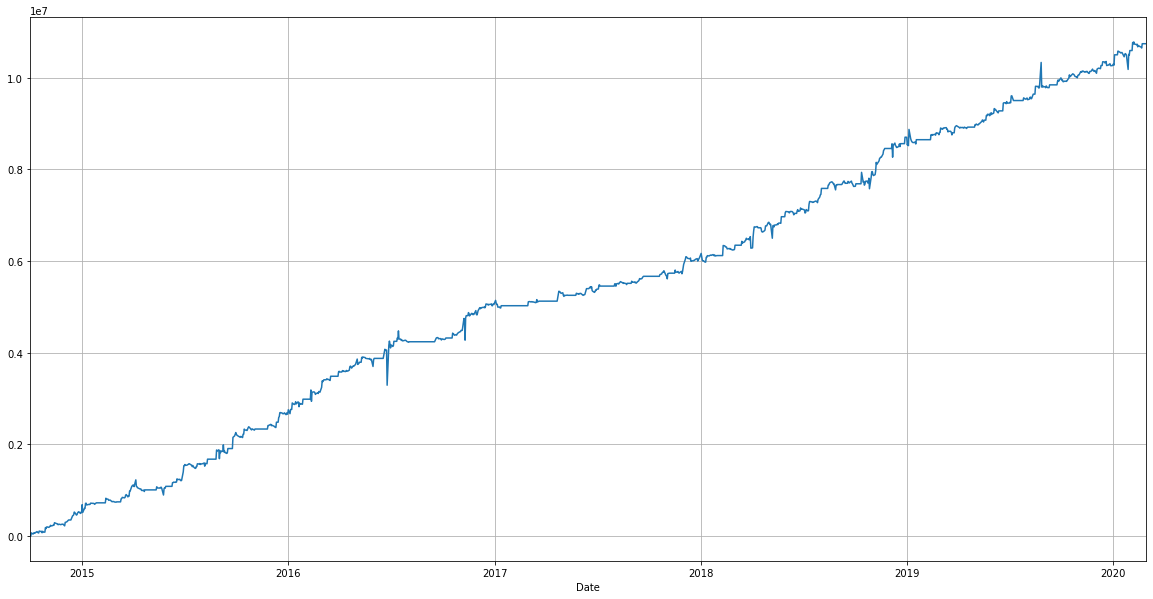

In [5]:
 # =========================== testing =================================================================
# configs = {'opening_signal_threshold': 0.006, 'closing_signal_threshold': -0.006,
#                'dealing_cutoff_time_london': time(11, 0, 0),
#                'earliest_trading_time_london': {'TP1 Index': time(10, 55, 0), 'ES1 Index': time(10, 55, 0)},
#                'minimum_holding_period_days': 10, 'vol_based_thresholds': True, 'open_threshold_factors': [0.00024, 0],
#                'close_threshold_factors': [-0.0001, 0], 'equity_trade': False, 'start_dt': '2014-10-01',
#                'end_dt': '2020-03-01', 'geo_settings': {'US': 'ES1 Index', 'JP': 'TP1 Index'}, 'one_position': True,
#                'funds': ['JPMUEAA LN Equity', 'HSBAMCA LN Equity'], 'fair_value_threshold_constraint': 0.015}

add_trading_daytime_cols(data_dic_by_asset, symbol_dic, **configs)
backtest_df = create_backtest_df(data_dic_by_asset, **configs)
backtest_df = get_complete_backtest_df(backtest_df, dic['universe'], **configs)
txs_pos_dic = get_txs_pos_dfs(backtest_df, daily_price_df, dic['universe'], **configs)
pnl_gbp = get_pnl_gbp(backtest_df, txs_pos_dic, daily_price_df, dic['universe'], **configs)
total_daily_pnl_gbp = get_total_daily_pnl(pnl_gbp)
total_cum_pnl_gbp = total_daily_pnl_gbp.cumsum()
total_cum_pnl_gbp.plot(grid=True, figsize=(20, 10))
perf_matrix = get_perf_matrix(total_cum_pnl_gbp)


In [7]:
# ========================== checking ================================================
a = backtest_df[backtest_df['JP_txs_signal'].ne(0) | backtest_df['US_txs_signal'].ne(0)]
# b = txs_pos_dic['position'][txs_pos_dic['position']['TP1 Index'].ne(0) | txs_pos_dic['position']['ES1 Index'].ne(0)]
# a = backtest_df[backtest_df['US_txs_signal'].ne(0)]


In [7]:
from trading.research.mft_backtest import get_daily_net_txs_val_gbp, get_daily_value_at_end_gbp, \
    get_daily_position, get_daily_txs, get_daily_value_at_end, get_daily_net_txs_val, get_opn_trade_indicator
from numpy import nan

daily_txs_value = get_daily_net_txs_val(backtest_df, txs_pos_dic, daily_price_df, dic['universe'], **configs)
daily_value_at_end = get_daily_value_at_end(backtest_df, txs_pos_dic, daily_price_df, dic['universe'], **configs)
daily_position = get_daily_position(txs_pos_dic, **configs)
daily_txs = get_daily_txs(txs_pos_dic, **configs)
daily_txs_value_gbp = get_daily_net_txs_val_gbp(backtest_df, txs_pos_dic, daily_price_df, dic['universe'], **configs)
daily_value_at_end_gbp = get_daily_value_at_end_gbp(backtest_df, txs_pos_dic, daily_price_df, dic['universe'], **configs)
daily_txs_value_gbp['Date'] = daily_txs_value_gbp.index.date
daily_value_at_end_gbp['Date'] = daily_value_at_end_gbp.index.date
daily_txs_value.index = daily_txs_value.index.date
daily_value_at_end.index = daily_value_at_end.index.date
daily_txs.index = daily_txs.index.date
daily_position.index = daily_position.index.date
backtest_df.index = backtest_df.index.tz_convert('Europe/London').tz_localize(None)
daily_value_at_end_gbp = daily_value_at_end_gbp.replace(0, nan).groupby('Date').mean().fillna(0)
daily_txs_value_gbp = daily_txs_value_gbp.replace(0, nan).groupby('Date').mean().fillna(0)


In [10]:
# with ExcelWriter('vol_based_threshold_2.xlsx') as writer:
#     # return_df.to_excel(writer, sheet_name='annual_return_standard')
#     factor_return_df.to_excel(writer, sheet_name='annual_return_vol_based')
#     # sharpe_df.to_excel(writer, sheet_name='sharpe_standard')
#     factor_sharpe_df.to_excel(writer, sheet_name='sharpe_vol_based')
#     daily_value_at_end_gbp.to_excel(writer, sheet_name='value_at_end_standard')
#     daily_txs_value_gbp.to_excel(writer, sheet_name='txs_value_standard')
#     daily_txs.to_excel(writer, sheet_name='txs_standard')
#     daily_position.to_excel(writer, sheet_name='position_standard')
#     backtest_df.to_excel(writer, sheet_name='backtest_df')
#     total_cum_pnl_gbp.to_excel(writer, sheet_name='cum_net_pnl_gbp_standard')

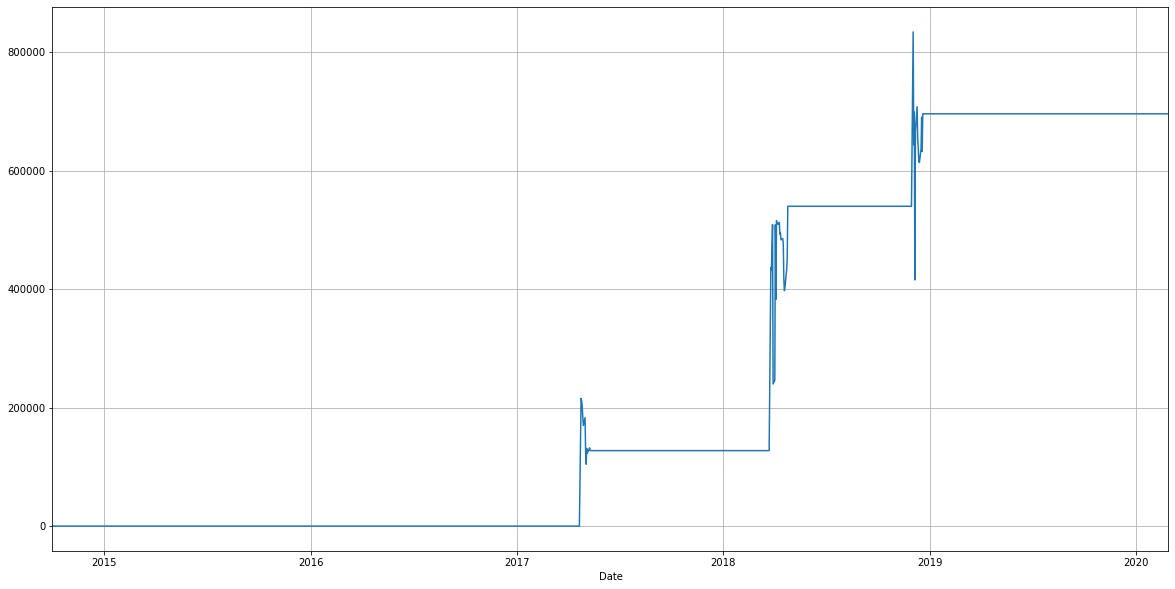

In [30]:
# # ================================== Upload daily price series onto db ===========================================
# from pandas import read_excel
# from pandas import DataFrame, concat
# p = read_excel('data_residual.xlsx', sheet_name='d_price')
# universe = read_excel('data_residual.xlsx', sheet_name='universe')


In [34]:
# def save_d_price_to_db(d_price, universe, db_engine):
#     p = d_price.set_index('Dates')
#     universe = universe.set_index('BB Ticker')
#     db_asset_type_map = universe.loc[p.columns, 'Asset class']

#     list_of_df = []
#     for columns in p:
#         temp_df = DataFrame(index=p.index, columns=['as_of', 'value', 'aspect', 'source', 'symbol', 'resolution', 'asset_type', 'price_type'])
#         temp_df['value'] = p[columns]
#         temp_df = temp_df.dropna(how='all', axis='index')
#         temp_df.index.name = 'time'
#         temp_df = temp_df.reset_index()
#         temp_df['as_of'] = temp_df['time']
#         temp_df['aspect'] = 'close'
#         temp_df['source'] = 'Bloomberg'
#         temp_df['symbol'] = columns
#         temp_df['resolution'] = '1d'
#         temp_df['asset_type'] = db_asset_type_map[columns]
#         if db_asset_type_map[columns] == 'fund':
#             temp_df['price_type'] = 'nav'
#         else:
#             temp_df['price_type'] = 'trade'
#         list_of_df.append(temp_df)

#     result_df = concat(list_of_df, axis='index', ignore_index=True)
#     result_df.to_sql('api_price', con=db_engine, index=False, if_exists='append')

In [8]:
# backtest_df.index = backtest_df.index.tz_convert('Europe/London')
# result = backtest_df.at_time('10:55:00')
# result.index = result.index.tz_localize(None)
# result.to_excel('signal_test.xlsx')

In [10]:
# bk_cp = backtest_df.copy()
# bk_cp.index= bk_cp.index.tz_convert('Europe/London')
# bk_cp = bk_cp.at_time('10:55:00')
# bk_cp.index = bk_cp.index.tz_localize(None)
# bk_cp.to_excel('signals_test.xlsx')

Timestamp('2014-09-03 05:00:00+0000', tz='UTC')

'JP'

numpy.datetime64('2014-09-03')

2

True